# Implementing Feedforward neural networks with Keras and TensorFlow

In [ ]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
tf.keras.layers.serialize
tf.keras.utils.CustomObjectScope
tf.keras.utils.register_keras_serializable

In [ ]:
# Load the training and testing data MNIST
# Import dataset & split into train and test data
mnist=tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()
# Length of the training dataset
len(x_train)
len(y_train)
60000
# Length of the testing dataset
len(x_test)
len(y_test)
10000
# Shape of the training dataset
x_train.shape
(60000, 28, 28)
# Shape of the testing dataset
x_test.shape
(10000, 28, 28)
# See first Image Matrix
x_train[0]

11490434/11490434 [==============================] - 0s 0us/step


array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

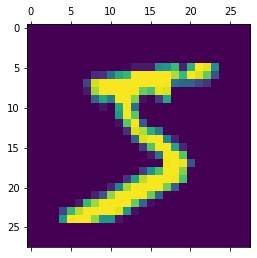

In [ ]:
plt.matshow(x_train[0])

In [ ]:
# Normalize the iamges by scaling pixel intensities to the range 0,1
x_train=x_train/255
x_test=x_test/255
# See first Naormalize Image Matrix
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [ ]:
# Define the network architecture using Keras
model=keras.Sequential([
# Input Layer
keras.layers.Flatten(input_shape = (28,28)),
# Hidden Layer
keras.layers.Dense(128,activation ='relu'),
# Output Layer
keras.layers.Dense(10,activation = 'softmax')
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compile the Model
model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
#Train the model using SGD
history=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6475 - accuracy: 0.8333 - val_loss: 0.3606 - val_accuracy: 0.9000
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3366 - accuracy: 0.9053 - val_loss: 0.2965 - val_accuracy: 0.9180
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2888 - accuracy: 0.9182 - val_loss: 0.2631 - val_accuracy: 0.9276
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2596 - accuracy: 0.9269 - val_loss: 0.2393 - val_accuracy: 0.9327
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2368 - accuracy: 0.9336 - val_loss: 0.2216 - val_accuracy: 0.9376
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2181 - accuracy: 0.9384 - val_loss: 0.2086 - val_accuracy: 0.9413
Epoch 7/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2019 - accuracy: 0.9434 - val_loss: 0.1934 - val_accuracy:

In [ ]:
test_loss,test_acc=model.evaluate(x_test,y_test)
print("Loss=%.3f" %test_loss)
print("Accuracy=%.3f" %test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.1628 - accuracy: 0.9528
Loss=0.163
Accuracy=0.953


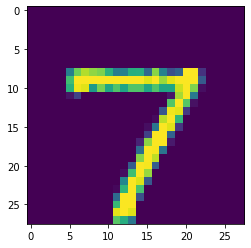

In [ ]:
# Making Prediction on New Data
n=random.randint(0,9999)
plt.imshow(x_test[n])
plt.show()

In [ ]:
predicted_value=model.predict(x_test)
print("Handwritten number is = %d" %np.argmax(predicted_value[n]))

313/313 [==============================] - 1s 3ms/step
Handwritten number is = 7


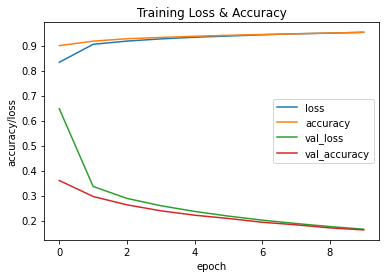

In [ ]:
# Plot the training loss and accuracy

history.history.keys()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training Loss & Accuracy')
plt.ylabel('accuracy/loss')
plt.xlabel('epoch')
plt.legend(['loss', 'accuracy', 'val_loss', 'val_accuracy'])
plt.show()  